In [7]:

import cv2
import matplotlib.pyplot as plt
import imutils
import glob
import numpy as np


    

def watershed(img):  
   
    source=img.copy()
    shifted = cv2.pyrMeanShiftFiltering(img, 30, 30)

    gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)

    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)


    sure_bg = cv2.dilate(opening,kernel,iterations=3)


    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)


    ret, markers = cv2.connectedComponents(sure_fg)


    markers = markers+1

    markers[unknown==255] = 0
    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,255,0]
    img[markers == 1] = [0,0,0]
    

    dst = cv2.addWeighted(source, 0.5, img, 1.5, 0)
  
   
    return img

if __name__ == '__main__':
    path = glob.glob("contourb\*.png")
   # output_path='lung/beningn'
    c=0


    for file in path:
        source=cv2.imread(file)
        source1=watershed(source)
        cv2.imwrite(f'input/beningn_new{c}.png',source1)

        c+=1
        cv2.waitKey(0)

        cv2.destroyAllWindows()





   

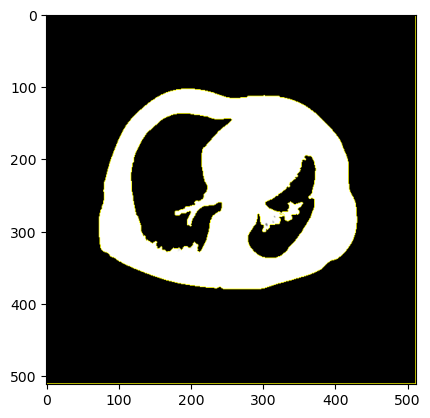

In [2]:
import cv2
import matplotlib.pyplot as plt
import imutils
import glob
import numpy as np
    

def watershed(img):  
   
    source=img.copy()
    shifted = cv2.pyrMeanShiftFiltering(img, 30, 30)

    gray = cv2.cvtColor(shifted,cv2.COLOR_BGR2GRAY)

    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)


    sure_bg = cv2.dilate(opening,kernel,iterations=3)


    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)


    ret, markers = cv2.connectedComponents(sure_fg)


    markers = markers+1

    markers[unknown==255] = 0
    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,255,0]
    img[markers == 1] = [0,0,0]
    

    dst = cv2.addWeighted(source, 0.5, img, 1.5, 0)
  
   
    return img
img = cv2.imread("input/malignant/malignant0.png")
       
smoothed_img =watershed(img)
plt.imshow(smoothed_img)